## Pre Processing Data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
DATA_PATH ="../data/spotify_songs.csv"
OUTPUT_PATH= "../data/processed_spotify_songs.csv"

In [3]:
df = pd.read_csv(DATA_PATH)
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [5]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


# Dealing with empty values

We will start by checking for empty entries in the dataset and handling these cases.

In [6]:
print("Number of empty cells in each column:")
print(df.isna().sum())
print('\n')
nan_rows = df[df.isna().any(axis=1)]
print("The rows with empty values are:")
print(nan_rows)

Number of empty cells in each column:
track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


The rows with empty values are:
                     track_id track_name track_artist  track_popularity  \
8151   69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   
9282   5cjecvX0CmC9gK0Laf5EMQ        NaN          NaN                 0   


Since we are looking at 32833 entries, we chose to drop the 5 rows containing empty values for now for simplicity, and as they will not affect the overall analysis. Our only worry was to make sure that there wasn't an underlying pattern correlated to these missing values, however, since it is the track_name, track_artist and track_album_name columns with missing values, and the track_popularity was 0 for all 5 of these rows, we believe that dropping them will not affect the overall analysis.

Furthermore, these 5 rows have empty values for all 3 columns where there are empty values, and not sparse empty values throughout multiple rows and columns, which would have required more effort to deal with.

In [7]:
df = df.dropna()
print("Number of empty cells in each column:")
print(df.isna().sum())

Number of empty cells in each column:
track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


# Dealing with Duplicate Data

We will also check for duplicate entries in the dataset and handle these cases as duplicates will affect the importance of different song features in predicting its popularity.

In [8]:
print("Number of duplicates in the dataset:")
print(df.duplicated().sum())

Number of duplicates in the dataset:
0


We thus notice that there are no duplicated rows in the dataset. However, when checking for duplicates of the "track_id" feature, as supposedly these "track_ids" should be unique for each song, we notive that there are 4476 duplicates!

In [9]:
df_duplicated_track_id = df.drop_duplicates(subset=['track_id'])
print(f"Len of df before - after duplicates removal = {len(df)} - {len(df_duplicated_track_id)} = {len(df) - len(df_duplicated_track_id)}")

Len of df before - after duplicates removal = 32828 - 28352 = 4476


When inspecting the data further, we notice that the duplicates with the same track_ids are sometimes the same song but saved in different playlists, or same songs but saved under the different genres. 

In order to remove duplicates in a more delicate matter, we decided to remove duplicates based on the track_id uniquely of songs that have the same track_name and track_artist as well as genre as these are the most important features to identify a song. Therefore, if the playlist names are different for example then that is fine.

Lastly, to deal with the duplicates in the case where the track_id, track_name, track_artist and genre are the same, instead of randomly dropping one of the duplicates, we will save an additional entity with the same features and the varying features averaged out (ex. track_popularity), then remove both duplicate entries. This way, we can keep the data as accurate as possible.

Furthermore, if the genres are different, we will modify the genre to become a list of the dplicate genres, and remove the duplicates. This will allow us to control for potential patterns regarding why these genres would be different, and eventually create a new genre category that is a combination of the two genres.

In [11]:
grouped = df.groupby(['track_id', 'track_name', 'track_artist'])
processed_songs = []
features_to_average = ['track_popularity', 'key', 'loudness', 'danceability', 'energy', 'speechiness',
                           'acousticness', 'instrumentalness', 'liveness', 'valence']

for key, group in grouped:
    # If only one song in the group, no duplicates, so add it as-is
    if len(group) == 1:
        processed_songs.append(group)
    else:
        # Handle duplicates based on genre and subgenre of the playlist with the track
        unique_genres = group['playlist_genre'].unique()
        unique_subgenres = group['playlist_subgenre'].unique()
        
        if len(unique_genres) > 1:
            # Combine genres into a list
            combined_genre = ', '.join(unique_genres)
            group['playlist_genre'] = combined_genre

        if len(unique_subgenres) > 1:
            # Combine subgenres into a list
            combined_subgenre = ', '.join(unique_subgenres)
            group['playlist_subgenre'] = combined_subgenre
        

        new_song = group.iloc[0].copy()
        avg_features = group[features_to_average].mean()
        for feature in features_to_average:
                new_song[feature] = avg_features[feature]
        
        processed_songs.append(pd.DataFrame([new_song]))

final_df = pd.concat(processed_songs, ignore_index=True)
final_df = final_df.drop_duplicates(subset=['track_id', 'track_name', 'track_artist', 'playlist_genre', 'playlist_subgenre'], keep='first')

print(f"Len of df before - after duplicates removal = {len(df)} - {len(final_df)} = {len(df) - len(final_df)}")

Len of df before - after duplicates removal = 32828 - 28352 = 4476


In [16]:
df = final_df
print(df['playlist_genre'].value_counts())
print(df['playlist_subgenre'].value_counts())

playlist_genre
rap                           4994
edm                           4877
r&b                           4449
rock                          4264
pop                           4102
latin                         3980
pop, edm                       274
pop, r&b                       217
pop, latin                     180
rap, r&b                       147
rap, latin                     147
pop, rock                      107
latin, edm                      93
rap, edm                        61
r&b, edm                        55
latin, r&b                      45
pop, latin, edm                 43
pop, latin, r&b, edm            42
pop, latin, r&b                 39
rock, r&b                       35
pop, rap                        33
pop, r&b, edm                   27
rap, rock                       22
latin, r&b, edm                 18
pop, rap, r&b                   12
pop, rap, edm                   11
pop, rap, latin                 11
rap, latin, r&b                 10
rap, 

We decided to further investigate the playlist genres and subgenres to potentially account for imbalance in the data.

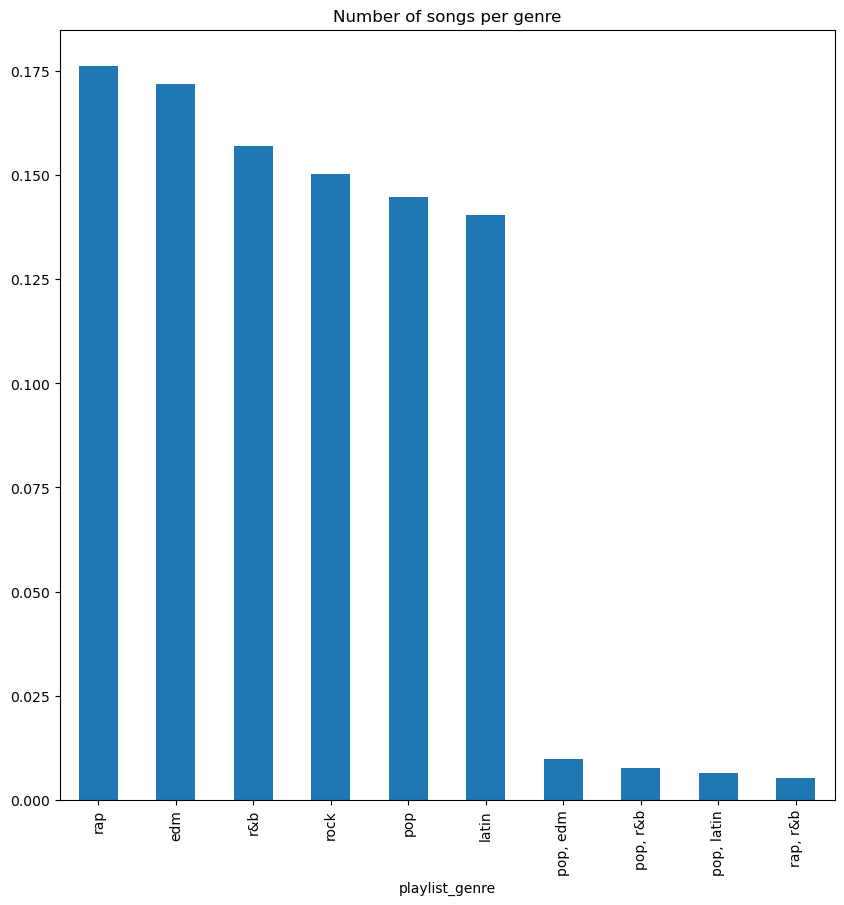

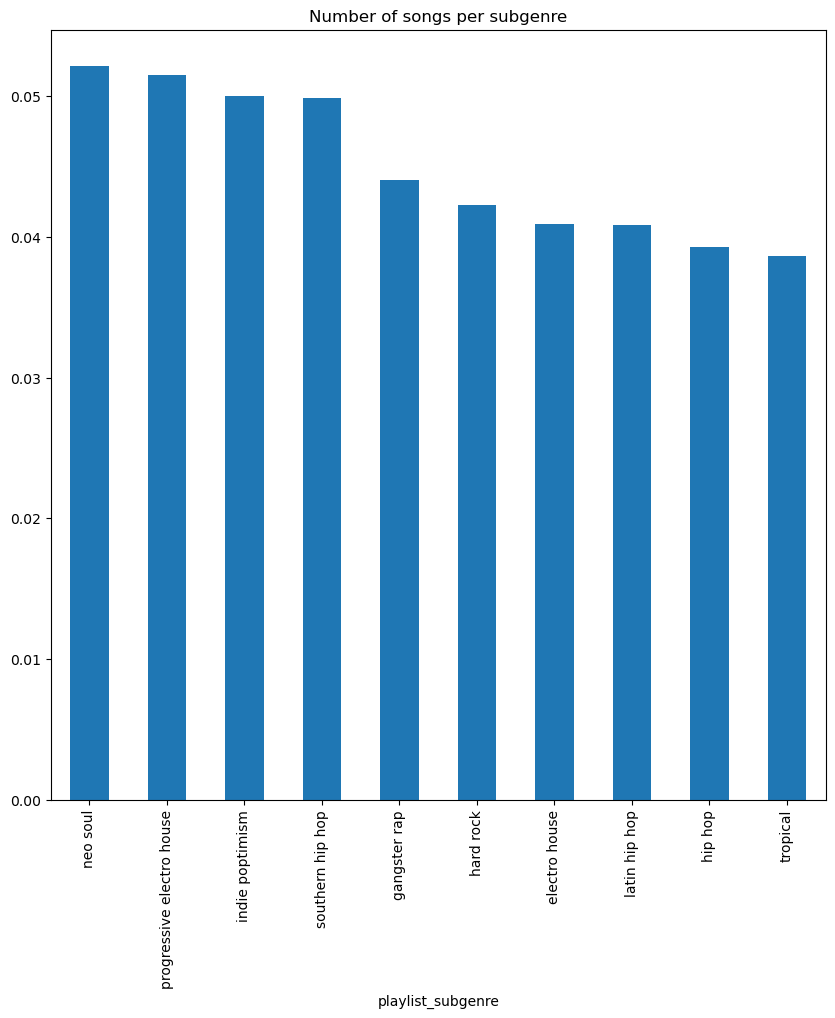

In [23]:
fig = plt.figure(figsize=(10, 10))
playlist_genre_normalized = df['playlist_genre'].value_counts(normalize=True)
ten_first_genres = playlist_genre_normalized.head(10)
ten_first_genres.plot(kind='bar')
plt.title('Number of songs per genre')
plt.show()

fig = plt.figure(figsize=(10, 10))
playlist_subgenre_normalized = df['playlist_subgenre'].value_counts(normalize=True)
ten_first_subgenres = playlist_subgenre_normalized.head(10)
ten_first_subgenres.plot(kind='bar')
plt.title('Number of songs per subgenre')
plt.show()

I'm not sure that the code below really symbolizes useless columns because popularity might come from popular artists, and then the actual question is no longer what makes a song popular but rather what makes an artist popular. Maybe this could be integrated in the model in some way? I don't know? Charlotte do you want to try going more in depth in this direction + checking the patterns of the genres being combined in the duplicates?

I commented out for now.

In [11]:
### Drop all useless columns

# df = df.drop(
#     ["track_id", "track_album_id", "playlist_id", "track_name", "track_album_name", "playlist_name"],
#     axis=1,
# )

### Normalize data

In [24]:
scaler = MinMaxScaler()

columns_to_normalize = ["key", "loudness", "danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000
mean,39.335320,0.664675,0.698320,0.487947,0.830422,0.565533,0.117581,0.178262,0.091680,0.191722,0.515021,120.958219,226574.631102
std,23.699443,0.148312,0.183540,0.328522,0.063626,0.495696,0.111707,0.224159,0.233966,0.156514,0.236472,26.954502,61081.363704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,21.000000,0.570702,0.578926,0.181818,0.799148,0.000000,0.044662,0.014386,0.000000,0.092972,0.331988,99.972000,187741.250000
50%,42.000000,0.681587,0.721951,0.545455,0.842089,1.000000,0.068192,0.080181,0.000021,0.127510,0.516650,121.993500,216933.000000
75%,58.000000,0.773143,0.842973,0.818182,0.874615,1.000000,0.144880,0.261569,0.006612,0.250000,0.701312,133.999000,254975.250000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,239.440000,517810.000000


In [25]:
unique_values = df["playlist_genre"].unique()

# Display the unique values
print(unique_values)

['rock' 'r&b' 'pop' 'latin' 'edm' 'rap, r&b, edm' 'rap' 'pop, rock'
 'pop, latin' 'pop, r&b' 'pop, rap, r&b' 'pop, edm' 'rap, r&b'
 'pop, latin, edm' 'pop, rock, latin' 'latin, r&b' 'pop, latin, r&b'
 'rock, r&b' 'rap, latin' 'r&b, edm' 'pop, latin, r&b, edm' 'rap, edm'
 'latin, edm' 'pop, rap' 'latin, r&b, edm' 'pop, rap, edm' 'pop, r&b, edm'
 'pop, rock, r&b' 'rap, rock' 'rap, latin, r&b' 'pop, rap, latin'
 'rap, latin, r&b, edm' 'pop, rap, rock' 'pop, rap, latin, edm'
 'pop, rock, edm' 'pop, rock, latin, r&b, edm' 'pop, rap, latin, r&b'
 'rock, latin' 'rock, latin, r&b' 'pop, rock, latin, r&b'
 'pop, rap, latin, r&b, edm' 'rock, edm' 'pop, rap, r&b, edm'
 'rap, latin, edm']


### Some plots

Maybe we can standardize some features below

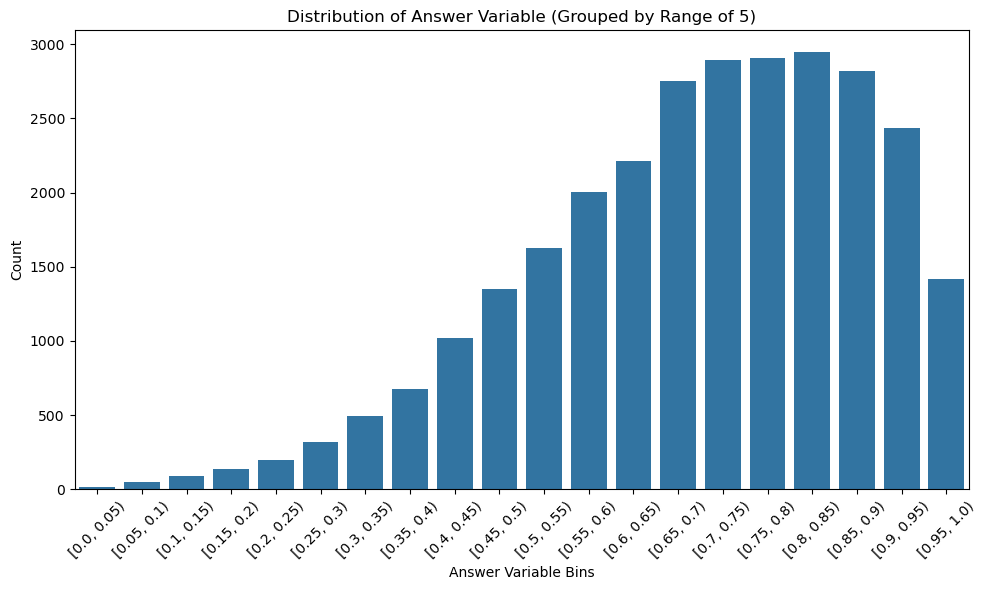

In [26]:
bins = [i / 20.0 for i in range(0, 21)]

# Create a new column 'binned_answer' with the binned data
df["binned_answer"] = pd.cut(df["energy"], bins=bins, right=False)

# Plot the distribution using countplot to show the counts for each bin
plt.figure(figsize=(10, 6))
sns.countplot(x="binned_answer", data=df)

# Customize the plot
plt.title("Distribution of Answer Variable (Grouped by Range of 5)")
plt.xlabel("Answer Variable Bins")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
bins = [i / 20.0 for i in range(0, 21)]

# Create a new column 'binned_answer' with the binned data
df["binned_answer"] = pd.cut(df["danceability"], bins=bins, right=False)

# Plot the distribution using countplot to show the counts for each bin
plt.figure(figsize=(10, 6))
sns.countplot(x="binned_answer", data=df)

# Customize the plot
plt.title("Distribution of Answer Variable (Grouped by Range of 5)")
plt.xlabel("Answer Variable Bins")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
bins = list(range(0, 105, 5))  # Bins from 0 to 100 (inclusive)

# Create a new column 'binned_answer' with the binned data
df["binned_answer"] = pd.cut(df["track_popularity"], bins=bins, right=False)

# Plot the distribution using countplot to show the counts for each bin
plt.figure(figsize=(10, 6))
sns.countplot(x="binned_answer", data=df)

# Customize the plot
plt.title("Distribution of Answer Variable (Grouped by Range of 5)")
plt.xlabel("Answer Variable Bins")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Calculate the correlation matrix
numeric_df = df.select_dtypes(include=["float64", "int64"])

correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

### Next to do:
- Remove/Transform all non-numerical columns
- One hot encoding
- Target Encoding (Mean Encoding) for artist name

**One hot encoding for playlist_genre or playlist_subgenre?** 

In [ ]:
playlist_unique_values = df['playlist_genre'].unique()
playlist_sub_unique_values = df["playlist_subgenre"].unique()

print(f"Genre for playlist_genre: {str(playlist_unique_values)}")
print(f"Genre for playlist_subgenre: {str(playlist_sub_unique_values)}")

In [ ]:
###
df_encoded = pd.get_dummies(df, columns=["playlist_genre"], drop_first=True)

# Display the new DataFrame with one-hot encoded columns
# Display rows 0 to 10 and columns 5 to 10
print(df_encoded.iloc[0:10, 17:23])  # Rows 0 to 10 and columns 5 to 10

In [ ]:
# Step 1: Calculate the mean target value for each 'track_artist'
mean_encoded_artist_track = df.groupby("track_artist")["track_popularity"].mean()

# Step 2: Map the mean target value back to the original DataFrame
df["artist_track_encoded"] = df["track_artist"].map(mean_encoded_artist_track)

# Display the updated DataFrame with the new encoded column
print(df[["track_artist", "artist_track_encoded"]].head())

In [21]:
df["track_album_release_date"] = pd.to_datetime(
    df["track_album_release_date"], errors="coerce"
)

df["release_year"] = df["track_album_release_date"].dt.year

# Extract the month
df["release_month"] = df["track_album_release_date"].dt.month

# Extract the day
df["release_day"] = df["track_album_release_date"].dt.day

**Save pre-processed data in a new csv file**

In [22]:
# Save pre-processed data to a CSV file
df.to_csv(OUTPUT_PATH, index=False)